<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

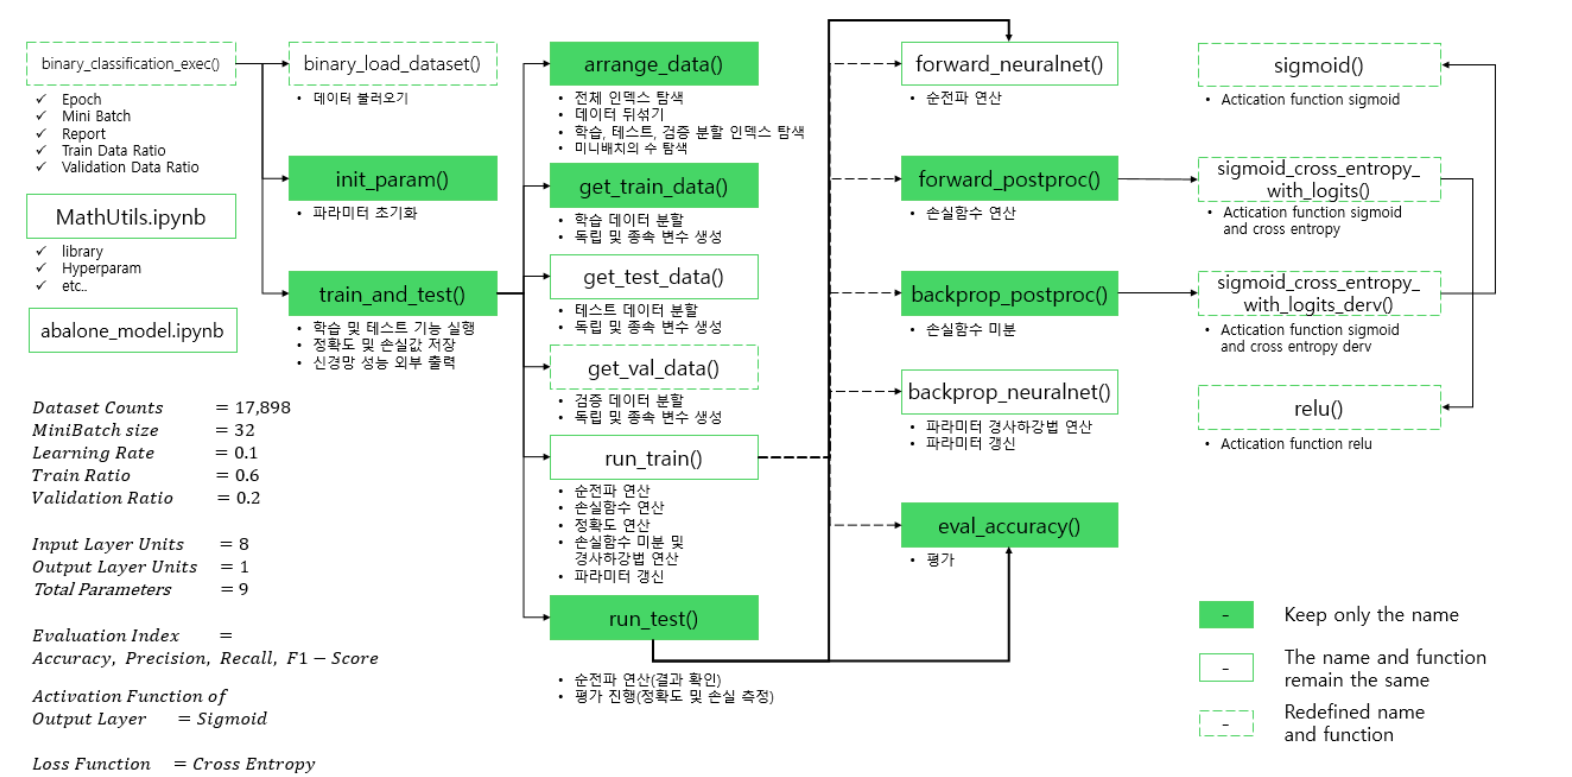

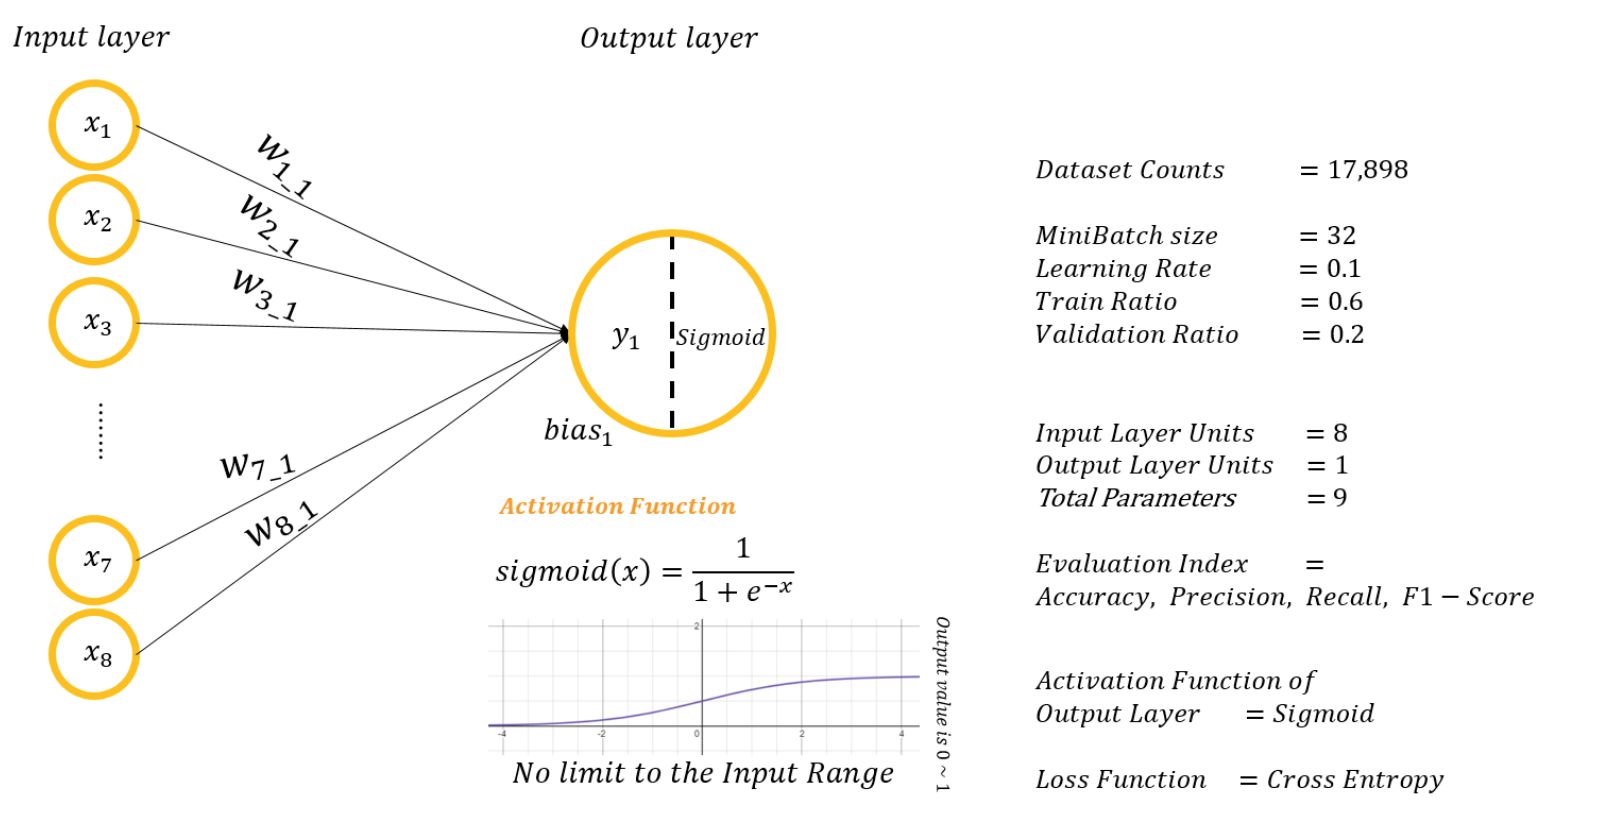

# 첫 번째 출력 예제

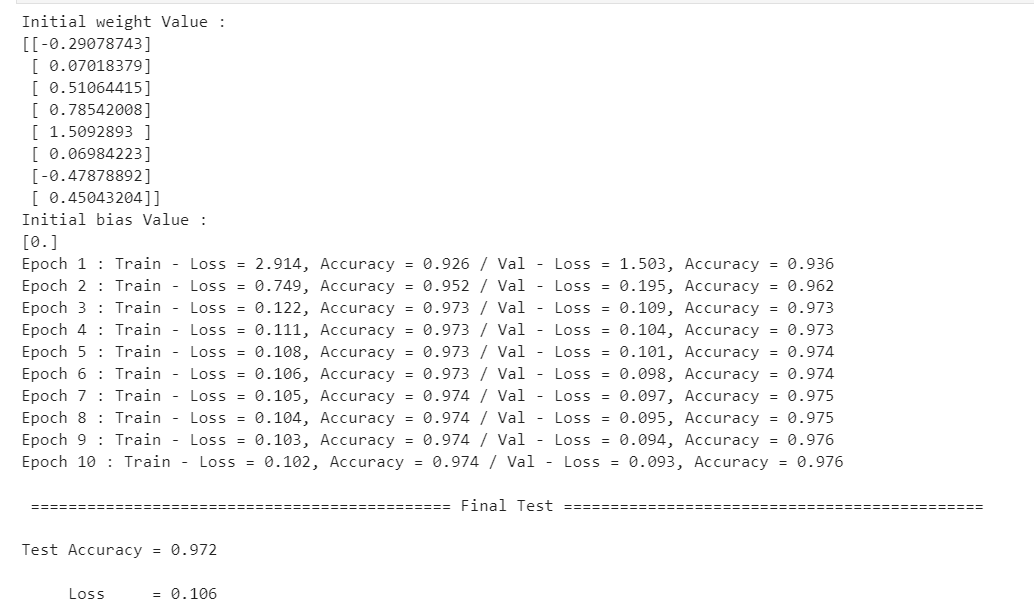

# 두번째 출력 예제

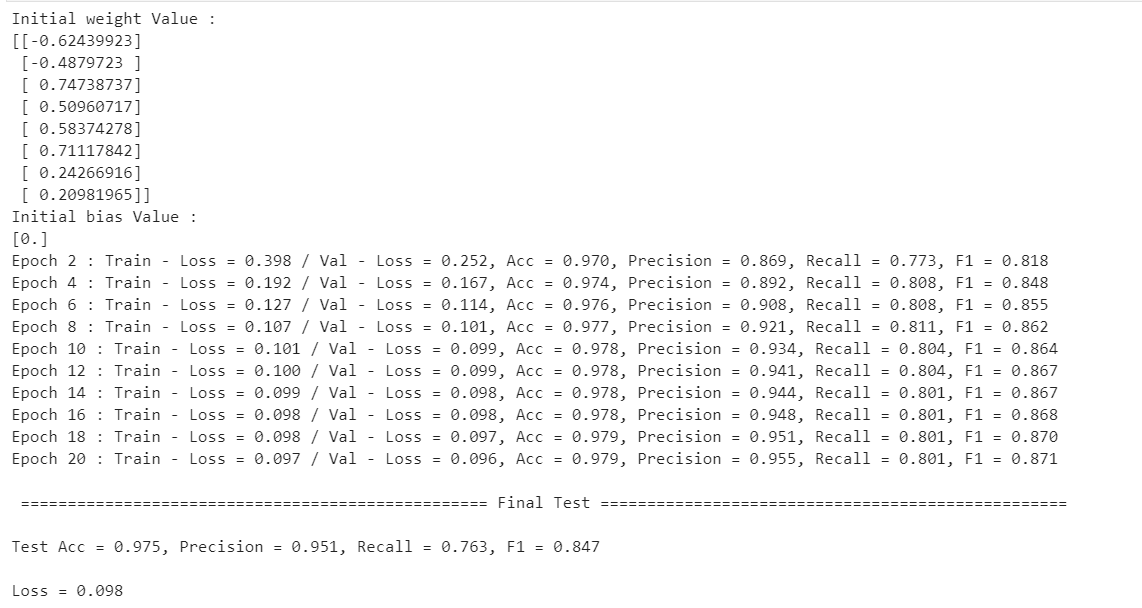

시각화 예제

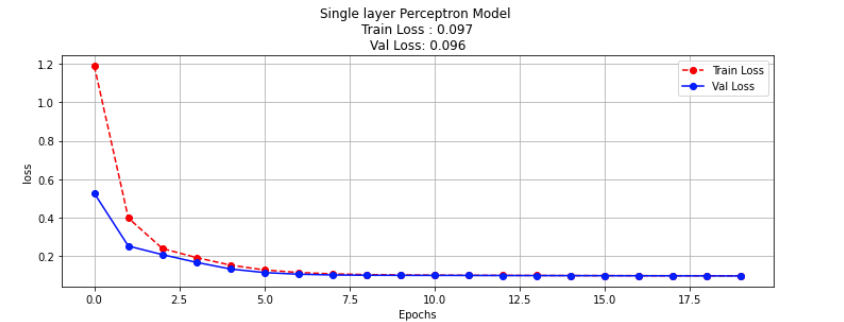

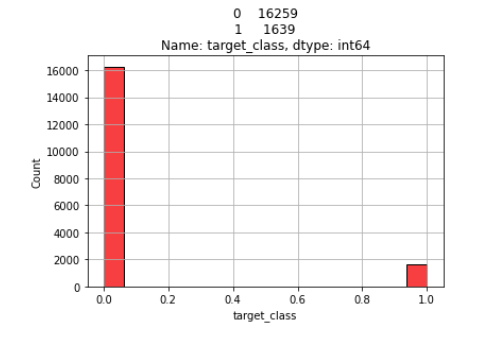

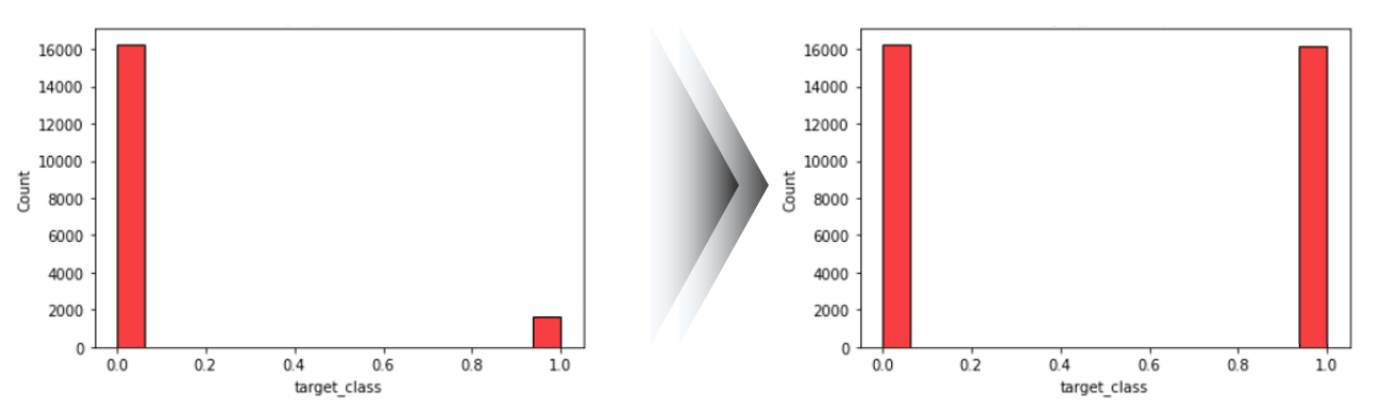

In [ ]:
%run /content/MathUtils.ipynb
%run /content/abalone_model.ipynb

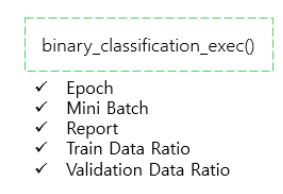

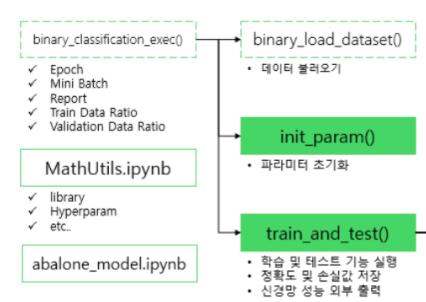

In [ ]:
def binary_classfication_exec(epoch_count = 10, mb_size=10,report =1,train_ratio=0.6,val_ratio=0.2):
    binary_load_dataset()
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count,mb_size,report,train_ratio,val_ratio)

    return train_metrics_mean_row, val_metrics_row, test_metrics

In [ ]:
def binary_load_dataset():
    # 실제로 실험을 진행할 때 사용되는 코드
    # with open('/content/pulsar_stars.csv') as csvfile:
    with open('/content/pulsar_stars_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 8, 1
    data= np.asarray(rows,dtype='float32')

In [ ]:
binary_load_dataset()

In [ ]:
print('data.shape',data.shape)
print(data[:3])

data.shape (10, 9)
[[ 1.36093750e+02  5.16910057e+01 -4.59089242e-02 -2.71816403e-01
   9.34280968e+00  3.80964012e+01  4.34543800e+00  1.86736488e+01
   0.00000000e+00]
 [ 9.93671875e+01  4.15722008e+01  1.54719698e+00  4.15410614e+00
   2.75551834e+01  6.17190170e+01  2.20880795e+00  3.66268015e+00
   1.00000000e+00]
 [ 1.00890625e+02  5.18903961e+01  6.27486527e-01 -2.64978018e-02
   3.88377929e+00  2.30452671e+01  6.95316744e+00  5.22794418e+01
   0.00000000e+00]]


In [ ]:
def init_param():
    global weight, bias 

#    기능 축소
#    weight_initial = []
#    bias_initial   = []
#   input_cnt, output_cnt = 8,1

    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])
    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}".format(bias))

#    weight_initial.append(weight)
#    bias_initial.append(bias)

#    return weight_initial, bias_initial

In [ ]:
init_param()

Initial Weight Value : 
[[-0.00903646]
 [ 0.02303648]
 [-0.0191617 ]
 [-0.05701169]
 [-0.03264371]
 [-0.01372072]
 [-0.00306749]
 [-0.02308927]]
Initial Bias Value : 
[0.]


In [ ]:
def train_and_test(epoch_count,mb_size,report,train_ratio,val_ratio):
    pass

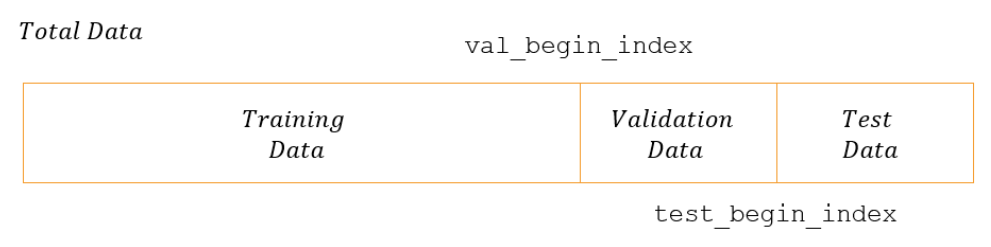

In [ ]:
def arrange_data(mb_size, train_ratio, val_ratio):
    
    global shuffle_map, test_begin_index, val_begin_index

    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size

    val_begin_index  = mini_batch_step_count * mb_size
    test_begin_index = int(val_begin_index + (val_ratio * data.shape[0])) 

    return mini_batch_step_count

In [ ]:
mini_batch_step_count = arrange_data(mb_size=1, train_ratio=0.6, val_ratio=0.2)

In [ ]:
print("mini_batch_step_count : ", mini_batch_step_count)
print("val_begin_index       : ", val_begin_index)
print("test_begin_index      : ", test_begin_index)

mini_batch_step_count :  6
val_begin_index       :  6
test_begin_index      :  8


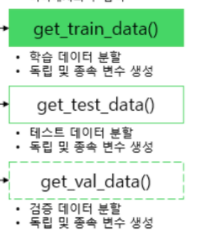

In [ ]:
# n : 미니배치 카운트 값 
def get_train_data(mb_size, n):
#    if n == 0:
#        np.random.shuffle(shuffle_map[:test_begin_index])

    from_idx = n * mb_size
    to_idx =  (n+1) * mb_size
    

#    train_data = data[shuffle_map[mb_size * n : mb_size * (n+1) ]]
    train_data = data[shuffle_map[from_idx:to_idx]]
                                  
    return train_data[ : , : -output_cnt], train_data[ : , -output_cnt : ]

# 이미 구축해 놓은 함수이기 때문에 따로 다시 구축할 필요 없음.
def get_test_data():
    test_data = data[shuffle_map[test_begin_index:]]
    return test_data[ : , : -output_cnt], test_data[ : , -output_cnt : ]


def get_val_data():
    val_data = data[shuffle_map[ val_begin_index : test_begin_index ]]
    
    return val_data[:,:-output_cnt], val_data[:, -output_cnt:]

In [ ]:
train_x,train_y = get_train_data(mb_size=1,n=0)
val_x, val_y = get_val_data()
test_x, test_y = get_test_data()

In [ ]:
print(train_x.shape, train_y.shape)
print(val_x.shape,val_y.shape)
print(test_x.shape,test_y.shape)

(1, 8) (1, 1)
(2, 8) (2, 1)
(2, 8) (2, 1)


In [ ]:
def run_train(x,y):
    loss = 0
    accuracy = 100
    
    return loss,accuracy


def run_test(x,y):
    loss = 0
    accuracy= 100

    return loss,accuracy

In [ ]:
def train_and_test(epoch_count,mb_size,report,train_ratio,val_ratio):

    mini_batch_step_count = arrange_data(mb_size,train_ratio,val_ratio)

    test_x, test_y = get_test_data()
    val_x, val_y = get_val_data()

    val_loss_row, val_acc_row = [], []
    losses_mean_row, accs_mean_row = [], []

    # 에폭에 따른 반복문
    for epoch in range(epoch_count):
        
        losses,accs = [],[]
        
        # 배치에 따른 반복문
        for n in range(mini_batch_step_count):
          
          # 학습 데이터 학습과정 
          train_x,train_y = get_train_data(mb_size,n)

          loss,acc = run_train(train_x,train_y)

          losses.append(loss)
          accs.append(acc)
        
        # 검증 데이터 검증 과정
        val_loss,val_acc = run_test(val_x,val_y)
        val_loss_row.append(val_loss)
        val_acc_row.append(val_acc)

        if report > 0 and (epoch+1)% report == 0 :
          print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Val - Loss={:.3f},Accuracy={:.3f}".\
                format(epoch+1,np.mean(losses),np.mean(accs), val_loss,val_acc))
          
        # 학습 데이터에 대한 평균값(에폭에 따른 평가 지표값)
        losses_mean = np.mean(losses)
        accs_mean = np.mean(accs)

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs)

        # 태스트 데이터로 테스트 하는 과정
        test_loss,test_acc = run_test(test_x,test_y)

        print('\n','=' * 40,"Final Test", "=" * 40)
        print("\nTest Accuracy : {:.3f}".format(test_acc))
        print("\nTest Loss : {:.3f}".format(test_loss))

    return [losses_mean_row,accs_mean_row] , [val_loss_row,val_acc_row] , [test_loss, test_acc]

In [ ]:
train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count=100,
                                                                       mb_size=1,
                                                                       report=1,
                                                                       train_ratio=0.6,
                                                                       val_ratio=0.2)


Epoch 1 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss=0.000,Accuracy=100.000

 ======================================== Final Test ========================================

Test Accuracy : 100.000

Test Loss : 0.000
Epoch 2 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss=0.000,Accuracy=100.000

 ======================================== Final Test ========================================

Test Accuracy : 100.000

Test Loss : 0.000
Epoch 3 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss=0.000,Accuracy=100.000

 ======================================== Final Test ========================================

Test Accuracy : 100.000

Test Loss : 0.000
Epoch 4 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss=0.000,Accuracy=100.000

 ======================================== Final Test ========================================

Test Accuracy : 100.000

Test Loss : 0.000
Epoch 5 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss=0.000,Accuracy=100.000

 =======

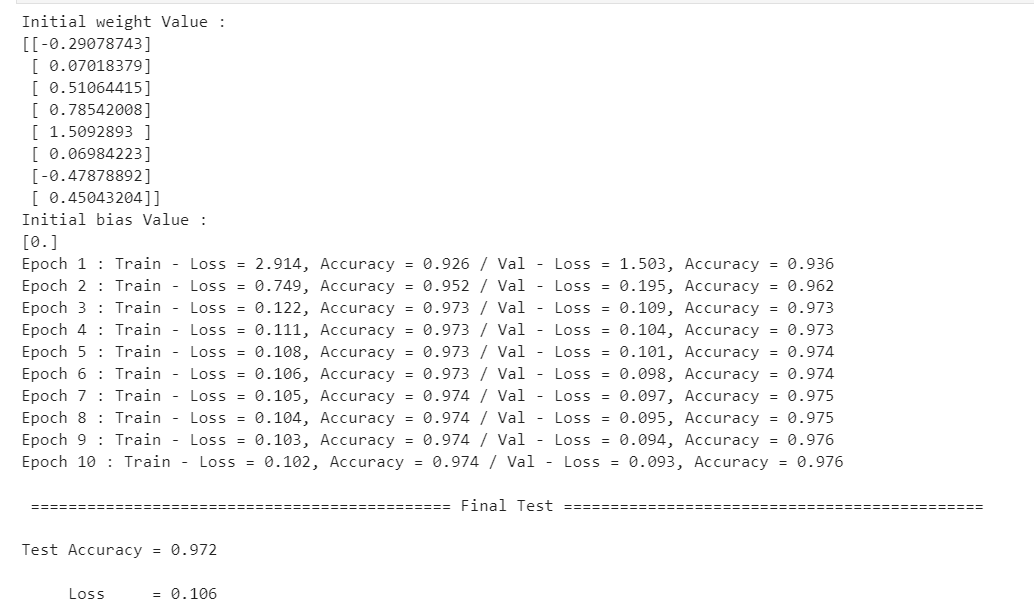